In [220]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Ví dụ 1.

In [2]:
N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

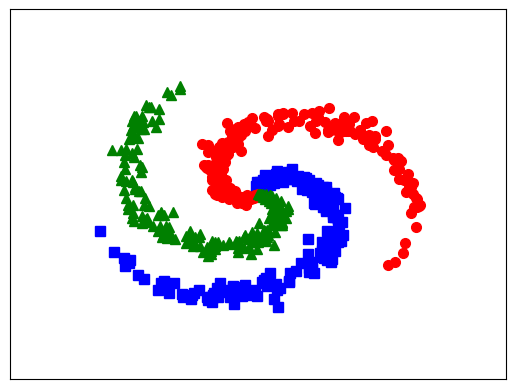

In [3]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [4]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [5]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [6]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098615
iter 1000, loss: 0.141103
iter 2000, loss: 0.062927
iter 3000, loss: 0.039011
iter 4000, loss: 0.030442
iter 5000, loss: 0.025764
iter 6000, loss: 0.022796
iter 7000, loss: 0.020665
iter 8000, loss: 0.019090
iter 9000, loss: 0.017856


In [7]:
Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0) 
Z2 = np.dot(W2.T, A1) + b2 
predicted_class = np.argmax(Z2, axis=0) 
acc = 100*np.mean(predicted_class == y) 
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
200


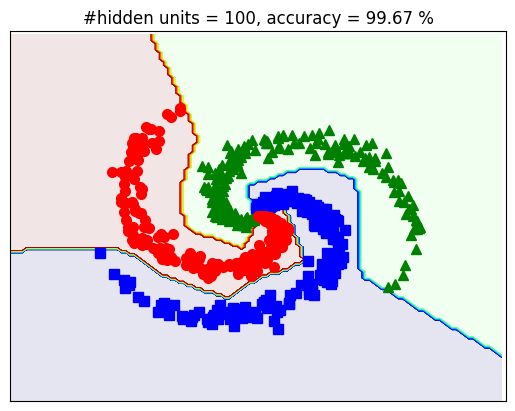

In [8]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1))
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2

# predicted class
Z = np.argmax(Z2, axis=0)  
Z = Z.reshape(xx.shape) 
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1) 
 
N = 200 
print(N) 
  
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7); 
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7); 
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7); 
plt.xlim([-1.5, 1.5]) 
plt.ylim([-1.5, 1.5]) 
cur_axes = plt.gca() 
cur_axes.axes.get_xaxis().set_ticks([]) 
cur_axes.axes.get_yaxis().set_ticks([]) 
 
plt.xlim(-1.5, 1.5) 
plt.ylim(-1.5, 1.5) 
plt.xticks(()) 
plt.yticks(()) 
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc)) 
fn = 'ex_res'+ str(d1) + '.png' 
# plt.savefig(fn, bbox_inches='tight', dpi = 600) 
plt.show()

#### Bài tập tự thực hành 1:

In [9]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
df = pd.DataFrame(X)
y['class'] = y['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18004\3161670035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train, X_test = X_train.to_numpy().T, X_test.to_numpy().T
y_train, y_test = y_train.to_numpy().squeeze(), y_test.to_numpy().squeeze()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4, 120) (4, 30)
(120,) (30,)


ANN:

In [75]:
d0 = 4
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[1]
eta = 0.05 # learning rate

In [76]:
for i in range(20000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.097118
iter 1000, loss: 0.076605
iter 2000, loss: 0.065451
iter 3000, loss: 0.060987
iter 4000, loss: 0.057884
iter 5000, loss: 0.055391
iter 6000, loss: 0.053288
iter 7000, loss: 0.051477
iter 8000, loss: 0.049906
iter 9000, loss: 0.048538
iter 10000, loss: 0.047348
iter 11000, loss: 0.046315
iter 12000, loss: 0.045421
iter 13000, loss: 0.044651
iter 14000, loss: 0.043990
iter 15000, loss: 0.043424
iter 16000, loss: 0.042940
iter 17000, loss: 0.042529
iter 18000, loss: 0.042178
iter 19000, loss: 0.041880


In [77]:
# inference on train set
Z1 = np.dot(W1.T, X_train) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [78]:
# inference on test set
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Logistic regression:

In [57]:
sm = LogisticRegression()
sm.fit(X_train.T, y_train)

y_pred = sm.predict(X_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Naive Bayes:

In [58]:
gnb = GaussianNB(priors=None)
gnb.fit(X_train.T, y_train)

y_pred = gnb.predict(X_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



- Mạng ANN cho độ chính xác cao nhất trong số tất cả các mô hình

Thay đổi các hidden layer:

In [91]:
# before
d0 = 4
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[1]
eta = 0.05 # learning rate

for i in range(5000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on train set
Z1 = np.dot(W1.T, X_train) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On train set:')
print(classification_report(y_train, y_pred))

# inference on test set
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On train set:')
print(classification_report(y_test, y_pred))

iter 0, loss: 1.097118
iter 1000, loss: 0.076605
iter 2000, loss: 0.065451
iter 3000, loss: 0.060987
iter 4000, loss: 0.057884
On train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

On train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
# after
d0 = 4
d1, d2 = 75, 50 # size of hidden layer
d3 = C = 3
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
W3 = 0.01*np.random.randn(d2, d3)
b3 = np.zeros((d3, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[1]
eta = 0.05 # learning rate

for i in range(5000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = np.maximum(Z2, 0)
    Z3 = np.dot(W3.T, A2) + b3
    Yhat = softmax(Z3)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E3 = (Yhat - y_train_encode)/N
    dW3 = np.dot(A2, E3.T)
    db3 = np.sum(E3, axis=1, keepdims=True)
    E2 = np.dot(W3, E3)
    E2[Z2 <= 0] = 0
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2
    W3 += -eta*dW3
    b3 += -eta*db3

# inference on train set
Z1 = np.dot(W1.T, X_train) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
A2 = np.maximum(Z2, 0)
Z3 = np.dot(W3.T, A2) + b3
Yhat = softmax(Z3)
y_pred = np.argmax(Yhat, axis=0)
print(classification_report(y_train, y_pred))

# inference on test set
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
A2 = np.maximum(Z2, 0)
Z3 = np.dot(W3.T, A2) + b3
Yhat = softmax(Z3)
y_pred = np.argmax(Yhat, axis=0)
print(classification_report(y_test, y_pred))

iter 0, loss: 1.098654
iter 1000, loss: 0.073855
iter 2000, loss: 0.068680
iter 3000, loss: 0.061000
iter 4000, loss: 0.057371
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        40
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Ví dụ 2

In [92]:
# train path 
train_images_path = 'train-images-idx3-ubyte.gz'
train_labels_path = 'train-labels-idx1-ubyte.gz'
# test path 
test_images_path = 't10k-images-idx3-ubyte.gz'
test_labels_path = 't10k-labels-idx1-ubyte.gz'

def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

images, labels = get_mnist_data( 
    train_images_path, train_labels_path, 5000, shuffle=True) 
  
print(images.shape, labels.shape)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18004\77315703.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


a.

In [107]:
pca = PCA(n_components=125)
transformed = pca.fit_transform(images)

b.

In [112]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(transformed, labels, 
                                                    train_size=0.7, random_state=42, stratify=labels)
X_train, X_test = X_train.T, X_test.T

In [113]:
# lr 
lr = LogisticRegression()
lr.fit(X_train.T, y_train)

y_pred = lr.predict(X_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       161
           1       0.89      0.93      0.91       174
           2       0.76      0.77      0.76       137
           3       0.85      0.77      0.81       152
           4       0.81      0.82      0.81       139
           5       0.74      0.72      0.73       137
           6       0.81      0.82      0.82       153
           7       0.85      0.92      0.88       158
           8       0.72      0.66      0.69       146
           9       0.82      0.78      0.80       143

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
d0 = 125
d1 = 100 # size of hidden layer
d2 = C = 10
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[1]
eta = 0.001 # learning rate

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on test set
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print(classification_report(y_test, y_pred))

iter 0, loss: 2.790905
iter 1000, loss: 0.027021
iter 2000, loss: 0.008891
iter 3000, loss: 0.004912
iter 4000, loss: 0.003289
iter 5000, loss: 0.002433
iter 6000, loss: 0.001913
iter 7000, loss: 0.001565
iter 8000, loss: 0.001319
iter 9000, loss: 0.001136
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.98      0.98      0.98       174
           2       0.95      0.93      0.94       137
           3       0.94      0.88      0.90       152
           4       0.89      0.96      0.93       139
           5       0.91      0.89      0.90       137
           6       0.93      0.98      0.95       153
           7       0.96      0.94      0.95       158
           8       0.89      0.86      0.87       146
           9       0.92      0.93      0.92       143

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      

- ANN cho hiệu suất tốt hơn Softmax regression

d.

In [124]:
d0 = 125
d1 = 150 # size of hidden layer
d2 = C = 10
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[1]
eta = 0.001 # small learning rate to avoid overflow

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on train set
Z1 = np.dot(W1.T, X_train) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On train set:')
print(classification_report(y_train, y_pred))

# inference on test set
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On test set:')
print(classification_report(y_test, y_pred))

iter 0, loss: 3.502459
iter 1000, loss: 0.020521
iter 2000, loss: 0.007469
iter 3000, loss: 0.004274
iter 4000, loss: 0.002918
iter 5000, loss: 0.002185
iter 6000, loss: 0.001731
iter 7000, loss: 0.001426
iter 8000, loss: 0.001207
iter 9000, loss: 0.001043
On train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       321
           3       1.00      1.00      1.00       354
           4       1.00      1.00      1.00       323
           5       1.00      1.00      1.00       321
           6       1.00      1.00      1.00       358
           7       1.00      1.00      1.00       370
           8       1.00      1.00      1.00       339
           9       1.00      1.00      1.00       333

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00  

- Khi tăng kích thước hidden layer, kết quả có giảm nhẹ, điều này có thể do hiện tượng overfitting khi mô hình trở nên quá phức tạp

## Ví dụ 3

In [126]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
X, y = data.drop('Class', axis=1), data['Class']
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [136]:
X.shape, y.shape

((13611, 16), (13611,))

a.

In [ ]:
pca = PCA(n_components=3)
transformed = pca.fit_transform(X)

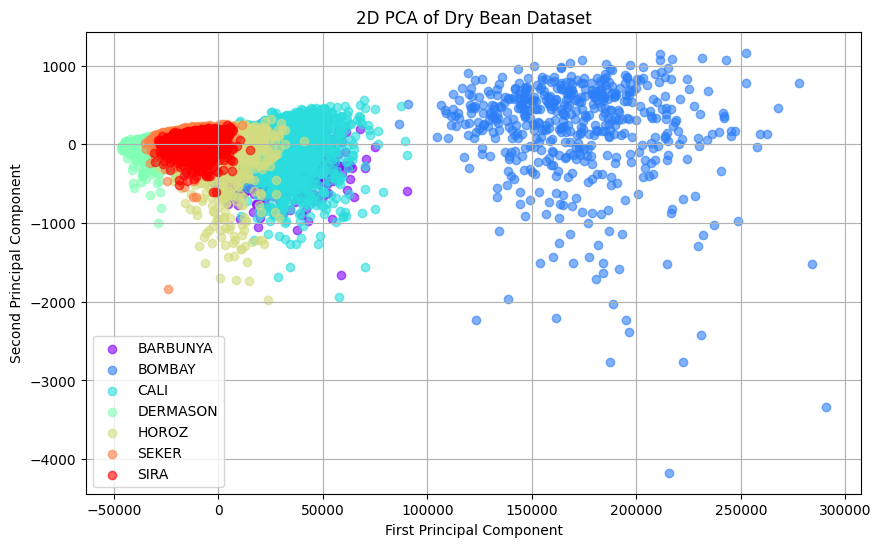

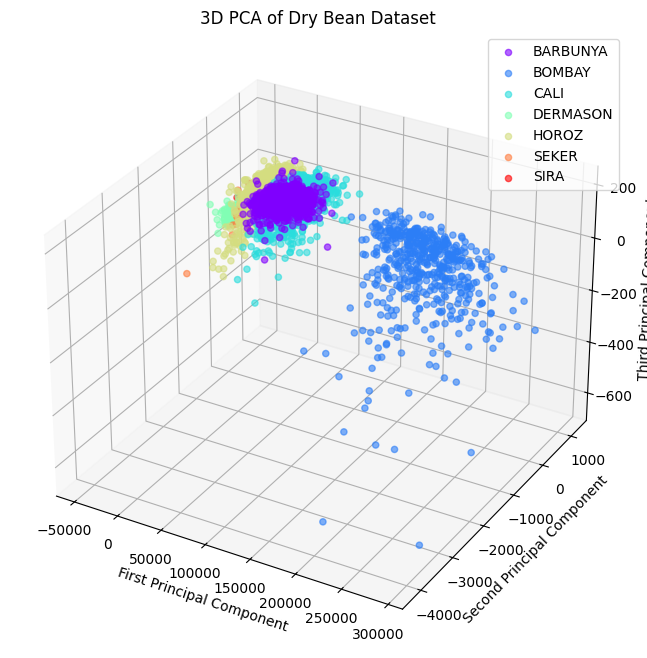

In [ ]:
# 2 dimension
X_2d = transformed[:, :2]

plt.figure(figsize=(10, 6))
unique_classes = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_classes)))

for class_id, color in zip(unique_classes, colors):
    mask = y == class_id
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], color=color, alpha=0.6, label=class_id)

plt.title('2D PCA of Dry Bean Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()

# 3 dimension
X_3d = transformed[:, :3]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for class_id, color in zip(unique_classes, colors):
    mask = y == class_id
    ax.scatter(X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2], 
              color=color, alpha=0.6, label=class_id)

ax.set_title('3D PCA of Dry Bean Dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.legend()
plt.show()

- Phân phối của dữ liệu sau khi giảm chiều có hiện tượng chồng lấn mạnh, chỉ có lớp BOMBAY là tách biệt rõ ràng

b.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                     random_state=42, stratify=y)

In [180]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [181]:
labels = y_train.unique().tolist()
label_map = {k:v for v,k in enumerate(labels)}
y_train_ = y_train.map(label_map).to_numpy()
y_test_ = y_test.map(label_map).to_numpy()

In [182]:
gnb = GaussianNB(priors=None)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_train)
print('On train set:')
print(classification_report(y_train, y_pred))

y_pred = gnb.predict(X_test)
print('On test set:')
print(classification_report(y_test, y_pred))

On train set:
              precision    recall  f1-score   support

    BARBUNYA       0.87      0.82      0.84       925
      BOMBAY       0.99      1.00      0.99       365
        CALI       0.87      0.90      0.89      1141
    DERMASON       0.93      0.88      0.90      2482
       HOROZ       0.94      0.95      0.94      1350
       SEKER       0.94      0.94      0.94      1419
        SIRA       0.82      0.86      0.84      1845

    accuracy                           0.90      9527
   macro avg       0.91      0.91      0.91      9527
weighted avg       0.90      0.90      0.90      9527

On test set:
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.79      0.84       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.86      0.92      0.89       489
    DERMASON       0.93      0.86      0.89      1064
       HOROZ       0.95      0.96      0.96       578
       SEKER       0.92      0.94      0.93       6

In [183]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
print('On train set:')
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test)
print('On test set:')
print(classification_report(y_test, y_pred))

On train set:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.93      0.95      0.94      1141
    DERMASON       0.92      0.92      0.92      2482
       HOROZ       0.96      0.95      0.96      1350
       SEKER       0.96      0.95      0.95      1419
        SIRA       0.86      0.87      0.87      1845

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527

On test set:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.94      0.94      0.94       489
    DERMASON       0.92      0.90      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.93      0.95      0.94       6

- Kết quả của logistic regression rất tốt, điều này có thể do dữ liệu của ta có khả năng chia được tuyến tính cao

In [185]:
d0 = 16
d1 = 32 # size of hidden layer
d2 = C = 7
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train_, C)
N = X_train.shape[0]
eta = 0.001 # learning rate

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on train set
Z1 = np.dot(W1.T, X_train.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On train set:')
print(classification_report(y_train_, y_pred))

# inference on test set
Z1 = np.dot(W1.T, X_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On test set:')
print(classification_report(y_test_, y_pred))

iter 0, loss: 1.945762
iter 1000, loss: 1.917122
iter 2000, loss: 1.892281
iter 3000, loss: 1.863757
iter 4000, loss: 1.815944
iter 5000, loss: 1.719034
iter 6000, loss: 1.551979
iter 7000, loss: 1.361504
iter 8000, loss: 1.199372
iter 9000, loss: 1.065345
On train set:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      2482
           1       0.68      0.98      0.80      1350
           2       0.94      0.92      0.93      1419
           3       0.63      0.07      0.13      1845
           4       0.98      0.06      0.12       925
           5       0.60      0.80      0.68      1141
           6       0.83      0.98      0.90       365

    accuracy                           0.69      9527
   macro avg       0.75      0.69      0.62      9527
weighted avg       0.72      0.69      0.60      9527

On test set:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1064
          

- Logistic regression cho hiệu suất tốt nhất
- ANN có hiệu suất thấp nhất, điều này có thể do mô hình chưa lặp đủ số lần cần thiết và do learning rate chưa phù hợp

c.

In [186]:
pca = PCA(n_components=4)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [188]:
gnb = GaussianNB(priors=None)
gnb.fit(pca_train, y_train)

y_pred = gnb.predict(pca_train)
print('On train set:')
print(classification_report(y_train, y_pred))

y_pred = gnb.predict(pca_test)
print('On test set:')
print(classification_report(y_test, y_pred))

On train set:
              precision    recall  f1-score   support

    BARBUNYA       0.79      0.65      0.71       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.79      0.84      0.81      1141
    DERMASON       0.88      0.88      0.88      2482
       HOROZ       0.90      0.95      0.93      1350
       SEKER       0.93      0.92      0.93      1419
        SIRA       0.80      0.82      0.81      1845

    accuracy                           0.86      9527
   macro avg       0.87      0.87      0.87      9527
weighted avg       0.86      0.86      0.86      9527

On test set:
              precision    recall  f1-score   support

    BARBUNYA       0.82      0.63      0.71       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.79      0.87      0.83       489
    DERMASON       0.88      0.87      0.88      1064
       HOROZ       0.91      0.96      0.93       578
       SEKER       0.93      0.92      0.93       6

In [189]:
lr = LogisticRegression(max_iter=10000)
lr.fit(pca_train, y_train)

y_pred = lr.predict(pca_train)
print('On train set:')
print(classification_report(y_train, y_pred))

y_pred = lr.predict(pca_test)
print('On test set:')
print(classification_report(y_test, y_pred))

On train set:
              precision    recall  f1-score   support

    BARBUNYA       0.79      0.70      0.74       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.80      0.84      0.82      1141
    DERMASON       0.92      0.92      0.92      2482
       HOROZ       0.95      0.95      0.95      1350
       SEKER       0.95      0.94      0.95      1419
        SIRA       0.84      0.87      0.85      1845

    accuracy                           0.89      9527
   macro avg       0.89      0.89      0.89      9527
weighted avg       0.89      0.89      0.89      9527

On test set:
              precision    recall  f1-score   support

    BARBUNYA       0.82      0.71      0.76       397
      BOMBAY       1.00      0.99      1.00       157
        CALI       0.81      0.86      0.84       489
    DERMASON       0.91      0.90      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.92      0.94      0.93       6

In [193]:
d0 = 4
d1 = 32 # size of hidden layer
d2 = C = 7
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train_, C)
N = pca_train.shape[0]
eta = 0.001 # learning rate

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, pca_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(pca_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on train set
Z1 = np.dot(W1.T, pca_train.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On train set:')
print(classification_report(y_train_, y_pred))

# inference on test set
Z1 = np.dot(W1.T, pca_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On test set:')
print(classification_report(y_test_, y_pred))

iter 0, loss: 1.945230
iter 1000, loss: 1.915867
iter 2000, loss: 1.888816
iter 3000, loss: 1.853792
iter 4000, loss: 1.788316
iter 5000, loss: 1.656268
iter 6000, loss: 1.460977
iter 7000, loss: 1.276721
iter 8000, loss: 1.129003
iter 9000, loss: 1.005685
On train set:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      2482
           1       0.72      0.98      0.83      1350
           2       0.94      0.93      0.93      1419
           3       0.64      0.08      0.15      1845
           4       1.00      0.03      0.06       925
           5       0.59      0.86      0.70      1141
           6       0.88      0.99      0.93       365

    accuracy                           0.69      9527
   macro avg       0.77      0.69      0.62      9527
weighted avg       0.73      0.69      0.61      9527

On test set:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1064
          

Nhận xét:
- Việc giảm chiều dữ liệu làm giảm hiệu suất của tất cả các mô hình
- ANN bị ảnh hưởng nhiều nhất: khả năng học các đặc trưng phức tạp bị giới hạn do input đơn giản hơn
- Naive Bayes ổn định nhất do giả định độc lập của Naive Bayes phù hợp với dữ liệu đã giảm chiều

## Ví dụ 4

In [204]:
import numpy as np  
import itertools
import matplotlib.pyplot as plt 
 
# path to the database - change it if needed 
path = r'yalefaces\\data\\'  
 
ids = range(1, 16) # 15 people 
states = ['centerlight', 'glasses', 'happy', 'leftlight',  
          'noglasses', 'normal', 'rightlight','sad',  
          'sleepy', 'surprised', 'wink' ] 
prefix = 'subject' 
 
# open one picture to get the image's size 
im = plt.imread(r'yalefaces\\data\\subject01.centerlight') 
 
h = im.shape[0] # height  
w = im.shape[1] # width 
 
D = h * w 
N = len(states)*15  
 
X = np.zeros((D, N)) 
y = np.zeros(N, dtype=np.int8)
 
# there are 15 people 
person_ids = range(1, 16)
for idx, (person_id, state) in enumerate(itertools.product(person_ids, states)):
    # get name of each image file 
    fn = path + prefix + str(person_id).zfill(2) + '.' + state
    # open the file and read as grey image 
    tmp = plt.imread(fn) 
    # then add image to dataset X 
    X[:, idx] = tmp.flatten()
    y[idx] = states.index(state)
X = X.T
X.shape, y.shape

((165, 77760), (165,))

i.

In [205]:
pca = PCA(n_components=125)
transformed = pca.fit_transform(X)

ii.

In [213]:
X_train, X_test, y_train, y_test = train_test_split(transformed, y, train_size=0.7, random_state=42,
                                                    stratify=y)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [214]:
gnb = GaussianNB(priors=None)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       1.00      0.40      0.57         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.31      1.00      0.47         4
          10       0.00      0.00      0.00         4

    accuracy                           0.26        50
   macro avg       0.22      0.27      0.20        50
weighted avg       0.23      0.26      0.20        50



In [215]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       1.00      0.40      0.57         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.31      1.00      0.47         4
          10       0.00      0.00      0.00         4

    accuracy                           0.26        50
   macro avg       0.22      0.27      0.20        50
weighted avg       0.23      0.26      0.20        50



In [217]:
d0 = 125
d1 = 100 # size of hidden layer
d2 = C = 11
# initialize parameters randomly
np.random.seed(0)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

y_train_encode = convert_labels(y_train, C)
N = X_train.shape[0]
eta = 0.01 # learning rate

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train_encode, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - y_train_encode)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# inference on test set
Z1 = np.dot(W1.T, X_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)
y_pred = np.argmax(Yhat, axis=0)
print('On test set:')
print(classification_report(y_test, y_pred))

iter 0, loss: 2.397847
iter 1000, loss: 1.766847
iter 2000, loss: 0.279623
iter 3000, loss: 0.137563
iter 4000, loss: 0.110564
iter 5000, loss: 0.099812
iter 6000, loss: 0.093975
iter 7000, loss: 0.090209
iter 8000, loss: 0.087516
iter 9000, loss: 0.085459
On test set:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         5
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         5
           7       0.14      0.20      0.17         5
           8       0.00      0.00      0.00         5
           9       0.25      0.25      0.25         4
          10       0.00      0.00      0.00         4

    accuracy                           0.08        50
   macro avg       0.16   

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Bài tập bổ sung

#### BT 1

In [218]:
data = pd.read_csv('SAT_GPA.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [219]:
X, y = data['SAT'], data['GPA']

In [247]:
def cost(Y, Yhat):
    return np.sum((Y - Yhat)**2)/Y.shape[1]

In [246]:
X_train, y_train = X[:60].to_numpy().reshape((1,-1)), y[:60].to_numpy().reshape((1,-1))
X_test, y_test = X[60:].to_numpy().reshape((1,-1)), y[60:].to_numpy().reshape((1,-1))

In [263]:
# Neural Network implementation for regression
d0 = 1  # input dimension
d1 = 100  # hidden layer size
d2 = 1  # output dimension

# Initialize parameters
np.random.seed(0)
W1 = 0.01 * np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01 * np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# Normalize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.T).T
X_test_scaled = scaler.transform(X_test.T).T

N = X_train.shape[1]
eta = 0.0001  # smaller learning rate for stability
losses = []

for i in range(10000):
    # Feedforward
    Z1 = np.dot(W1.T, X_train_scaled) + b1  # (100,1) x (1,60) -> (100,60)
    A1 = np.maximum(Z1, 0)  # ReLU activation
    Z2 = np.dot(W2.T, A1) + b2  # (1,100) x (100,60) -> (1,60)
    
    # Print loss every 1000 iterations
    if i % 1000 == 0:
        loss = np.mean((Z2 - y_train) ** 2)  # MSE loss
        losses.append(loss)
        print(f"iter {i}, loss: {loss:.6f}")
    
    # Backpropagation
    dZ2 = 2 * (Z2 - y_train) / N  # (1,60)
    dW2 = np.dot(A1, dZ2.T)  # (100,60) x (60,1) -> (100,1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2, dZ2)  # (100,1) x (1,60) -> (100,60)
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    dW1 = np.dot(X_train_scaled, dZ1.T)  # (1,60) x (60,100) -> (1,100)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # Gradient descent update
    W1 -= eta * dW1
    b1 -= eta * db1
    W2 -= eta * dW2
    b2 -= eta * db2

# Predictions on train set
Z1 = np.dot(W1.T, X_train_scaled) + b1
A1 = np.maximum(Z1, 0)
train_pred = np.dot(W2.T, A1) + b2

# Predictions on test set
Z1 = np.dot(W1.T, X_test_scaled) + b1
A1 = np.maximum(Z1, 0)
test_pred = np.dot(W2.T, A1) + b2

# Calculate metrics
test_mse = mean_squared_error(y_test.T, test_pred.T)
test_r2 = r2_score(y_test.T, test_pred.T)

print("\nTest Results:")
print(f'MSE: {test_mse:.6f}')
print(f'R2: {test_r2:.6f}')

iter 0, loss: 10.421142
iter 1000, loss: 6.980708
iter 2000, loss: 4.667141
iter 3000, loss: 3.103571
iter 4000, loss: 2.043715
iter 5000, loss: 1.326262
iter 6000, loss: 0.845491
iter 7000, loss: 0.529924
iter 8000, loss: 0.329111
iter 9000, loss: 0.205958

Test Results:
MSE: 0.392443
R2: -47.525704


#### BT 2

In [266]:
X = []
y = []

# read data
with open('vidu4_lin_reg.txt', 'r') as f:
    lines = f.readlines()
    header = lines[0].strip()
    attributes = header.split(' ')
    
    for line in lines[1:]:
        values = line.strip().split(' ')
        values = list(map(float, values))
        X.append(values[1:-1])
        y.append(values[-1])

X, y = np.array(X), np.array(y)
X.shape, y.shape

((100, 5), (100,))

In [267]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

In [273]:
# Neural Network implementation for regression
d0 = 5  # input dimension
d1 = 100  # hidden layer size
d2 = 1  # output dimension

# Initialize parameters
np.random.seed(0)
W1 = 0.01 * np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01 * np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# Normalize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).T
X_test_scaled = scaler.transform(X_test).T

N = X_train.shape[1]
eta = 0.0001  # smaller learning rate for stability
losses = []

for i in range(10000):
    # Feedforward
    Z1 = np.dot(W1.T, X_train_scaled) + b1  # (100,1) x (1,60) -> (100,60)
    A1 = np.maximum(Z1, 0)  # ReLU activation
    Z2 = np.dot(W2.T, A1) + b2  # (1,100) x (100,60) -> (1,60)
    
    # Print loss every 1000 iterations
    if i % 1000 == 0:
        loss = np.mean((Z2 - y_train) ** 2)  # MSE loss
        losses.append(loss)
        print(f"iter {i}, loss: {loss:.6f}")
    
    # Backpropagation
    dZ2 = 2 * (Z2 - y_train) / N  # (1,60)
    dW2 = np.dot(A1, dZ2.T)  # (100,60) x (60,1) -> (100,1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2, dZ2)  # (100,1) x (1,60) -> (100,60)
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    dW1 = np.dot(X_train_scaled, dZ1.T)  # (1,60) x (60,100) -> (1,100)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # Gradient descent update
    W1 -= eta * dW1
    b1 -= eta * db1
    W2 -= eta * dW2
    b2 -= eta * db2

# Predictions on train set
Z1 = np.dot(W1.T, X_train_scaled) + b1
A1 = np.maximum(Z1, 0)
train_pred = np.dot(W2.T, A1) + b2

# Predictions on test set
Z1 = np.dot(W1.T, X_test_scaled) + b1
A1 = np.maximum(Z1, 0)
test_pred = np.dot(W2.T, A1) + b2

# Calculate metrics
test_mse = mean_squared_error(y_test.T, test_pred.T)
test_r2 = r2_score(y_test.T, test_pred.T)

print("\nTest Results:")
print(f'MSE: {test_mse:.6f}')
print(f'R2: {test_r2:.6f}')

iter 0, loss: 1.259384
iter 1000, loss: 0.128819
iter 2000, loss: 0.124711
iter 3000, loss: 0.121444
iter 4000, loss: 0.117294
iter 5000, loss: 0.112706
iter 6000, loss: 0.108505
iter 7000, loss: 0.105287
iter 8000, loss: 0.103039
iter 9000, loss: 0.101444

Test Results:
MSE: 0.226940
R2: 0.216131


#### BT 3

In [274]:
data = pd.read_csv('real_estate.csv')
data.drop(['No'], inplace=True, axis=1)
data['X1 transaction date'] = np.trunc(data['X1 transaction date'])
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1


In [275]:
X, y = data.drop('Y house price of unit area', axis=1), data['Y house price of unit area']
X_train, y_train = X[:350].to_numpy(), y[:350].to_numpy()
X_test, y_test = X[350:].to_numpy(), y[350:].to_numpy()

In [278]:
# Neural Network implementation for regression
d0 = 6  # input dimension
d1 = 100  # hidden layer size
d2 = 1  # output dimension

# Initialize parameters
np.random.seed(0)
W1 = 0.01 * np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01 * np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# Normalize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).T
X_test_scaled = scaler.transform(X_test).T

N = X_train.shape[1]
eta = 0.0001  # smaller learning rate for stability
losses = []

for i in range(20000):
    # Feedforward
    Z1 = np.dot(W1.T, X_train_scaled) + b1  # (100,1) x (1,60) -> (100,60)
    A1 = np.maximum(Z1, 0)  # ReLU activation
    Z2 = np.dot(W2.T, A1) + b2  # (1,100) x (100,60) -> (1,60)
    
    # Print loss every 1000 iterations
    if i % 1000 == 0:
        loss = np.mean((Z2 - y_train) ** 2)  # MSE loss
        losses.append(loss)
        print(f"iter {i}, loss: {loss:.6f}")
    
    # Backpropagation
    dZ2 = 2 * (Z2 - y_train) / N  # (1,60)
    dW2 = np.dot(A1, dZ2.T)  # (100,60) x (60,1) -> (100,1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2, dZ2)  # (100,1) x (1,60) -> (100,60)
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    dW1 = np.dot(X_train_scaled, dZ1.T)  # (1,60) x (60,100) -> (1,100)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # Gradient descent update
    W1 -= eta * dW1
    b1 -= eta * db1
    W2 -= eta * dW2
    b2 -= eta * db2

# Predictions on train set
Z1 = np.dot(W1.T, X_train_scaled) + b1
A1 = np.maximum(Z1, 0)
train_pred = np.dot(W2.T, A1) + b2

# Predictions on test set
Z1 = np.dot(W1.T, X_test_scaled) + b1
A1 = np.maximum(Z1, 0)
test_pred = np.dot(W2.T, A1) + b2

# Calculate metrics
test_mse = mean_squared_error(y_test.T, test_pred.T)
test_r2 = r2_score(y_test.T, test_pred.T)

print("\nTest Results:")
print(f'MSE: {test_mse:.6f}')
print(f'R2: {test_r2:.6f}')

iter 0, loss: 1622.773175
iter 1000, loss: 55.502133
iter 2000, loss: 52.977846
iter 3000, loss: 49.432728
iter 4000, loss: 46.544840
iter 5000, loss: 44.543599
iter 6000, loss: 43.515863
iter 7000, loss: 43.205282
iter 8000, loss: 42.253406
iter 9000, loss: 41.694341
iter 10000, loss: 41.107886
iter 11000, loss: 40.681632
iter 12000, loss: 40.401306
iter 13000, loss: 39.938521
iter 14000, loss: 40.592776
iter 15000, loss: 40.853557
iter 16000, loss: 42.354014
iter 17000, loss: 40.661751
iter 18000, loss: 40.950271
iter 19000, loss: 40.336434

Test Results:
MSE: 45.103730
R2: 0.717378
